# Earth's crust: how finite are our resources?

## Publication quality figures  

Producing high-quality figures is an essential skill that takes practise and knowledge.  
Here are some guidelines...  

#### General  
Figures should convey the right amount of information. Too much is confusing and too little is boring. Break figures into sub-parts and label A, B, C, etc. if you need to. A single clear point to each part of each figure is helpful. If you export in bitmap form (e.g. jpg), be sure to have it at an adequately high resolution e.g. `plt.savefig(filename,dpi=300)`.  

#### Text  
Always use sans-serif fonts (e.g. Arial, NOT Times Roman). Text should all be about the same size. Journals will tend to size your figure to make the smallest text about 6 pt in size (depends on journal), so this sets the final size of your figure. It is fine to have 10-12 pt text on a figure in a thesis, but be aware of what that figure would look like if it were reduced so the text was 6 pt (a likely scenario if you want to use it in a publication)  

#### Colours and line/marker styles  
Colours enhance figures, but many people are colour blind, or may not have access to colour printers. Try to use line and marker weights and styles that allow figures to be understood even if colour drops out.



## Gold  
Gold is one of our most valuable minerals and possibly has the longest history of mining (going back at least 10,000 years and maybe >40,000 years). Gold is rare in Earth's crust, with an average value of only 1.3 ppb (by weight; Rudnick & Gao 2003, Treatise Geochem 3:1-64).  

Take a look at the code below and open the data file to try and understand what the code is doing. Ask questions, copy and paste the code into spyder and inspect what each object is, especially how data are selected.

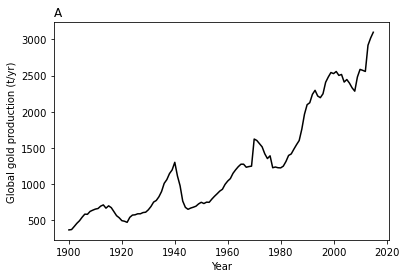

In [5]:
import numpy as np
import matplotlib.pyplot as plt

filename = '../data/gold/gold-production.csv'

label = np.genfromtxt(filename,delimiter=',',skip_header=1,
                      usecols=(0,),dtype='U20')

year,goldProduction = np.genfromtxt(filename,delimiter=',',skip_header=1,
                                    usecols=(2,3),unpack=True)

# select only rows that have label of 'World' 
selWorld = (label == 'World')
# select years from 1800
selYear = (year >= 1900)
# combine the selection with a logical AND
sel = selWorld & selYear

plt.figure(figsize=[6,4])
plt.title('A',loc='left')

# plot only the data selection
plt.plot(year[sel],goldProduction[sel],color='black')

plt.xlabel('Year')
# units are in tons/year
plt.ylabel('Global gold production (t/yr)')
plt.savefig('../figs/gold.jpg',dpi=300)
plt.savefig('../figs/gold.pdf')
plt.show()

The current reserves/production ratio for gold for the world, according to USGS, is about 18 years.  
Do you think we will run out of gold in 18 years from now?  

## Copper
Copper has been in use by humans for at least 10,000 years. It is the main ingredient of bronze (copper 88% and tin 12%), so defined human civilization development about 5,500 years ago at the start of the 'Bronze Age'. It continues to be a key material that humans use for a wide variety of purposes; and is surely a key material for energy transition, because it is a main ingredient for all electrical systems. It has been mined extensively by humans (the name derives from Cyprus, where Romans mined it).

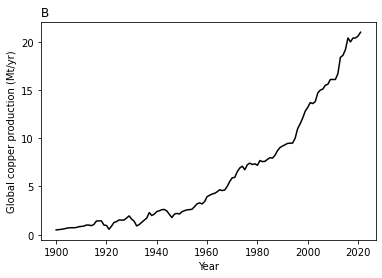

In [2]:
filename = '../data/copper/usgs-global-copper-production.csv'

yearCu,productionCu = np.genfromtxt(filename,delimiter=',',skip_header=1,
                                    usecols=(0,1),unpack=True)

plt.figure(figsize=[6,4])
plt.title('B',loc='left')

# plot only the data selection
plt.plot(yearCu,productionCu/1e6,color='black')

plt.xlabel('Year')
# units are in tons/year, but convert to Mt/yr
plt.ylabel('Global copper production (Mt/yr)')
plt.savefig('../figs/copper.jpg',dpi=300)
plt.savefig('../figs/copper.pdf')
plt.show()

According to USGS statistics, the current global reserves/production ratio for copper is about 40 years. 

## Price of copper through time

The tension between supply and demand for any commodity is reflected in its price. Let's look at how the price of copper in the USA, normalized to 2010 USD values, has varied through time.

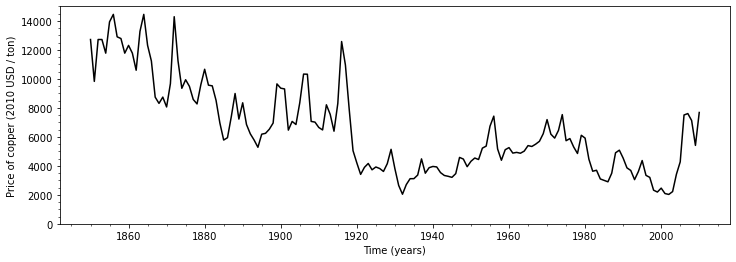

In [3]:
# Load historical copper prices in cents/pound
yearCu,priceCu = np.loadtxt('../data/copper/USGS_copper_historical_price.txt',
                           delimiter=' ',skiprows=4,usecols=[0,1],unpack=True)
# Convert from cents/pound to USD/ton
priceCu = priceCu * 0.01 / 0.000453592

# Load USA consumer price index (CPI) to inflation adjust
yearCPI,cpi = np.loadtxt('../data/economy/USA_CPI_inflation.csv',
                        delimiter=',',skiprows=20,usecols=[0,1],unpack=True)

# cpi in year 2010
cpi2010 = cpi[yearCPI==2010]

# narrow down the cpi data to just the years that exist for the copper data
selection = np.logical_and(yearCPI >= yearCu[0], yearCPI <= yearCu[-1])

# inflation adjust the prices - priceCu and cpi arrays have to be the same length (same years)
priceCu2010 = priceCu * cpi2010 / cpi[selection]

plt.figure(figsize=(12,4))
plt.minorticks_on()
plt.xlabel('Time (years)')
plt.ylabel('Price of copper (2010 USD / ton)')
plt.ylim(0,15000)
plt.plot(yearCu,priceCu2010,color='black')
plt.show()

The long-term price of copper has generally been falling. We are better at mining and processing copper ore and we have ever-growing economies of scale. Finding copper has not been a major problem.

## Bingham copper mine, Utah, USA

The Bingham mine is possibly the largest hole in the ground that humans have ever dug.

![Bingham mine](./Bingham_Copper_Mine.jpg)

Some good reviews of the mine can be found on [Wikipedia](https://en.wikipedia.org/wiki/Bingham_Canyon_Mine) or in the article 

[Krahulec, K. (2018). PRODUCTION HISTORY OF THE BINGHAM MINING DISTRICT, SALT LAKE COUNTY, UTAH: AN UPDATE. DOI: 10.13140/RG.2.2.28618.00966](https://www.researchgate.net/publication/328676854_Production_history_of_the_Bingham_mining_district_Salt_Lake_County_Utah_-_an_update) 

Let's take a peak at the production history of copper from the mine.


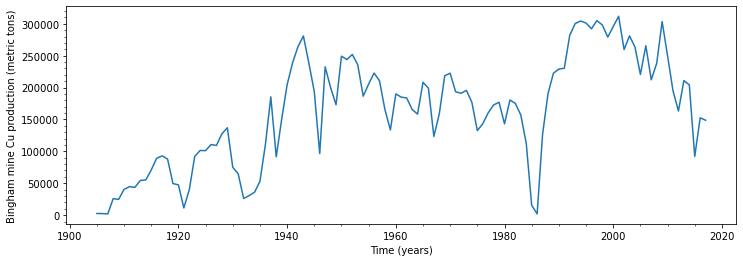

In [4]:
yearCuBM,productionCuBM = np.loadtxt('../data/copper/BinghamCanyonMine.csv',
                        delimiter=',',skiprows=8,usecols=[0,4],unpack=True)

# Convert from short tons to metric tons
productionCuBM = 0.907185 * productionCuBM

plt.figure(figsize=(12,4))
plt.minorticks_on()
plt.xlabel('Time (years)')
plt.ylabel('Bingham mine Cu production (metric tons)')
plt.plot(yearCuBM,productionCuBM)
plt.show()

## Your tasks
### Bingham copper mine  
Take a look at the data file and do some analysis of the mine. Produce some plots for your report, to support your discussion of mining.

* How did the stripping ratio (waste mined per unit of ore) and Cu ore grade (production/ore) change through time?
* What happened in the 1980s to disrupt production?
* What was the total value of copper produced from the mine so far in 2010 USD?
* What other elements have been produced, and can you estimate their total value at todays prices?
* What are the current proven reserves (do some research online)?
* Say something about environmental and safety issues - is it about to go bust?

### other materials
Your final report needs to offer some insights into the future, which you can deduce from analysis of the past. Will we have enough copper, gold, or other metals in future to get us through the energy transition? Plot up the production, reserves, and R/P for lithium. If you want to search for data on other key materials, then go for it!